In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install kaggle # install kaggle
! mkdir ~/.kaggle # make the kaggle directory
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # copy the json file to directory
! chmod 600 ~/.kaggle/kaggle.json # allocate the required permission

In [4]:
# download the dataset
! kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.12G/1.14G [00:13<00:00, 86.9MB/s]
100% 1.14G/1.14G [00:13<00:00, 89.8MB/s]


In [5]:
# unzip the dataset
! unzip /content/100-bird-species.zip -d /content/birds

Streaming output truncated to the last 5000 lines.
  inflating: /content/birds/train/TURKEY VULTURE/144.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/145.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/146.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/147.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/148.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/149.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/150.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/151.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/001.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/002.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/003.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/004.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/005.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/006.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/007.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT

In [6]:
# load the test set we need

test_path = '/content/birds/test'

# some image properties
img_height = 128
img_width = 128


In [7]:
# using tensorflow imagedatagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the datagens
test_datagen = ImageDataGenerator(rescale=1./255)

# generator from directory
test_generator = test_datagen.flow_from_directory(test_path, target_size=(img_height, img_width),
                                                  batch_size=32,class_mode='categorical',
                                                  color_mode='rgb',shuffle=True,
                                                  seed = 42)


Found 1575 images belonging to 315 classes.


In [8]:
# load the final model

model = models.load_model('/content/drive/MyDrive/birds_final_model.h5')
model.summary()

Model: "birds_pretrained_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_16 (Flatten)        (None, 8192)              0         
                                                                 
 dense_35 (Dense)            (None, 2048)              16779264  
                                                                 
 dropout_25 (Dropout)        (None, 2048)              0         
                                                                 
 dense_36 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_26 (Dropout)        (None, 2048)              0         
                                                                 
 dense_37 (Dense)            (None, 315)    

In [9]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 17s 114ms/step - loss: 0.2469 - acc: 0.9232
test acc:  92.32 %


We reached a test accuracy of 92.32%. Let's visualize how this works

In [10]:
pred = model.predict(test_generator, steps=50)
pred.shape

(1575, 315)

In [11]:
# first, what are the names of the classes of birds

train_path = '/content/birds/train'
categories = []

for index, category_name in enumerate(sorted(os.listdir(train_path))):
    image_file_loc = os.path.join(train_path, category_name)
    categories.append(category_name)

len(categories)

315

In [12]:
class_dict = dict(enumerate(categories))
print(class_dict)

{0: 'AFRICAN CROWNED CRANE', 1: 'AFRICAN FIREFINCH', 2: 'ALBATROSS', 3: 'ALEXANDRINE PARAKEET', 4: 'AMERICAN AVOCET', 5: 'AMERICAN BITTERN', 6: 'AMERICAN COOT', 7: 'AMERICAN GOLDFINCH', 8: 'AMERICAN KESTREL', 9: 'AMERICAN PIPIT', 10: 'AMERICAN REDSTART', 11: 'ANHINGA', 12: 'ANNAS HUMMINGBIRD', 13: 'ANTBIRD', 14: 'ARARIPE MANAKIN', 15: 'ASIAN CRESTED IBIS', 16: 'BALD EAGLE', 17: 'BALD IBIS', 18: 'BALI STARLING', 19: 'BALTIMORE ORIOLE', 20: 'BANANAQUIT', 21: 'BANDED BROADBILL', 22: 'BANDED PITA', 23: 'BAR-TAILED GODWIT', 24: 'BARN OWL', 25: 'BARN SWALLOW', 26: 'BARRED PUFFBIRD', 27: 'BAY-BREASTED WARBLER', 28: 'BEARDED BARBET', 29: 'BEARDED BELLBIRD', 30: 'BEARDED REEDLING', 31: 'BELTED KINGFISHER', 32: 'BIRD OF PARADISE', 33: 'BLACK & YELLOW bROADBILL', 34: 'BLACK BAZA', 35: 'BLACK FRANCOLIN', 36: 'BLACK SKIMMER', 37: 'BLACK SWAN', 38: 'BLACK TAIL CRAKE', 39: 'BLACK THROATED BUSHTIT', 40: 'BLACK THROATED WARBLER', 41: 'BLACK VULTURE', 42: 'BLACK-CAPPED CHICKADEE', 43: 'BLACK-NECKED GREB

In [13]:
test_generator[0][1][0] # labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
# shape of array of one-hotencoded label of first image in first batch
labels = test_generator[0][1]
print(labels[0].shape)
print(labels[0]) # label for the first image

(315,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [15]:
test_generator[0][0][0].shape # shape of first image in the first batch

(128, 128, 3)

In [16]:
# let's run this on the first batch of images
images = test_generator[0][0]
images.shape

(32, 128, 128, 3)

In [17]:
# let's predict for first batch only

pred_proba = model.predict(images, steps=50) 
prediction = np.argmax(pred_proba, axis=1)
prediction = list(prediction)
print(prediction)

predicted_bird_specie = []
for index, val in enumerate(prediction):
   for key, value in class_dict.items():
    if val == key:
      predicted_bird_specie.append(class_dict[key])

print(predicted_bird_specie)

[213, 114, 132, 235, 164, 90, 245, 201, 120, 151, 199, 310, 234, 113, 37, 173, 74, 108, 294, 68, 158, 153, 310, 83, 159, 255, 8, 242, 80, 283, 90, 113]
['PARAKETT  AKULET', 'FAIRY BLUEBIRD', 'GRAY CATBIRD', 'RED FODY', 'INDIAN ROLLER', 'CRESTED NUTHATCH', 'RING-NECKED PHEASANT', 'NORTHERN SHOVELER', 'GANG GANG COCKATOO', 'HOODED MERGANSER', 'NORTHERN PARULA', 'WILSONS BIRD OF PARADISE', 'RED FACED WARBLER', 'EVENING GROSBEAK', 'BLACK SWAN', 'KIWI', 'CHIPPING SPARROW', 'EMPEROR PENGUIN', 'UMBRELLA BIRD', 'CASPIAN TERN', 'HOUSE SPARROW', 'HORNBILL', 'WILSONS BIRD OF PARADISE', 'COMMON HOUSE MARTIN', 'HYACINTH MACAW', 'RUFUOS MOTMOT', 'AMERICAN KESTREL', 'RED WINGED BLACKBIRD', 'COLLARED ARACARI', 'TAIWAN MAGPIE', 'CRESTED NUTHATCH', 'EVENING GROSBEAK']


In [18]:
# let's see the actual bird species
actual_bird_class = np.argmax(labels, axis=1)
actual_bird_class = list(actual_bird_class)
print(actual_bird_class)

actual_bird_specie = []
for index, val in enumerate(prediction):
   for key, value in class_dict.items():
    if val == key:
      actual_bird_specie.append(class_dict[key])

print(actual_bird_specie)


[213, 114, 132, 235, 164, 90, 245, 201, 120, 151, 199, 310, 234, 113, 37, 173, 74, 108, 294, 68, 158, 153, 310, 83, 313, 255, 8, 242, 288, 283, 90, 113]
['PARAKETT  AKULET', 'FAIRY BLUEBIRD', 'GRAY CATBIRD', 'RED FODY', 'INDIAN ROLLER', 'CRESTED NUTHATCH', 'RING-NECKED PHEASANT', 'NORTHERN SHOVELER', 'GANG GANG COCKATOO', 'HOODED MERGANSER', 'NORTHERN PARULA', 'WILSONS BIRD OF PARADISE', 'RED FACED WARBLER', 'EVENING GROSBEAK', 'BLACK SWAN', 'KIWI', 'CHIPPING SPARROW', 'EMPEROR PENGUIN', 'UMBRELLA BIRD', 'CASPIAN TERN', 'HOUSE SPARROW', 'HORNBILL', 'WILSONS BIRD OF PARADISE', 'COMMON HOUSE MARTIN', 'HYACINTH MACAW', 'RUFUOS MOTMOT', 'AMERICAN KESTREL', 'RED WINGED BLACKBIRD', 'COLLARED ARACARI', 'TAIWAN MAGPIE', 'CRESTED NUTHATCH', 'EVENING GROSBEAK']


In [19]:
print(len(images))

32


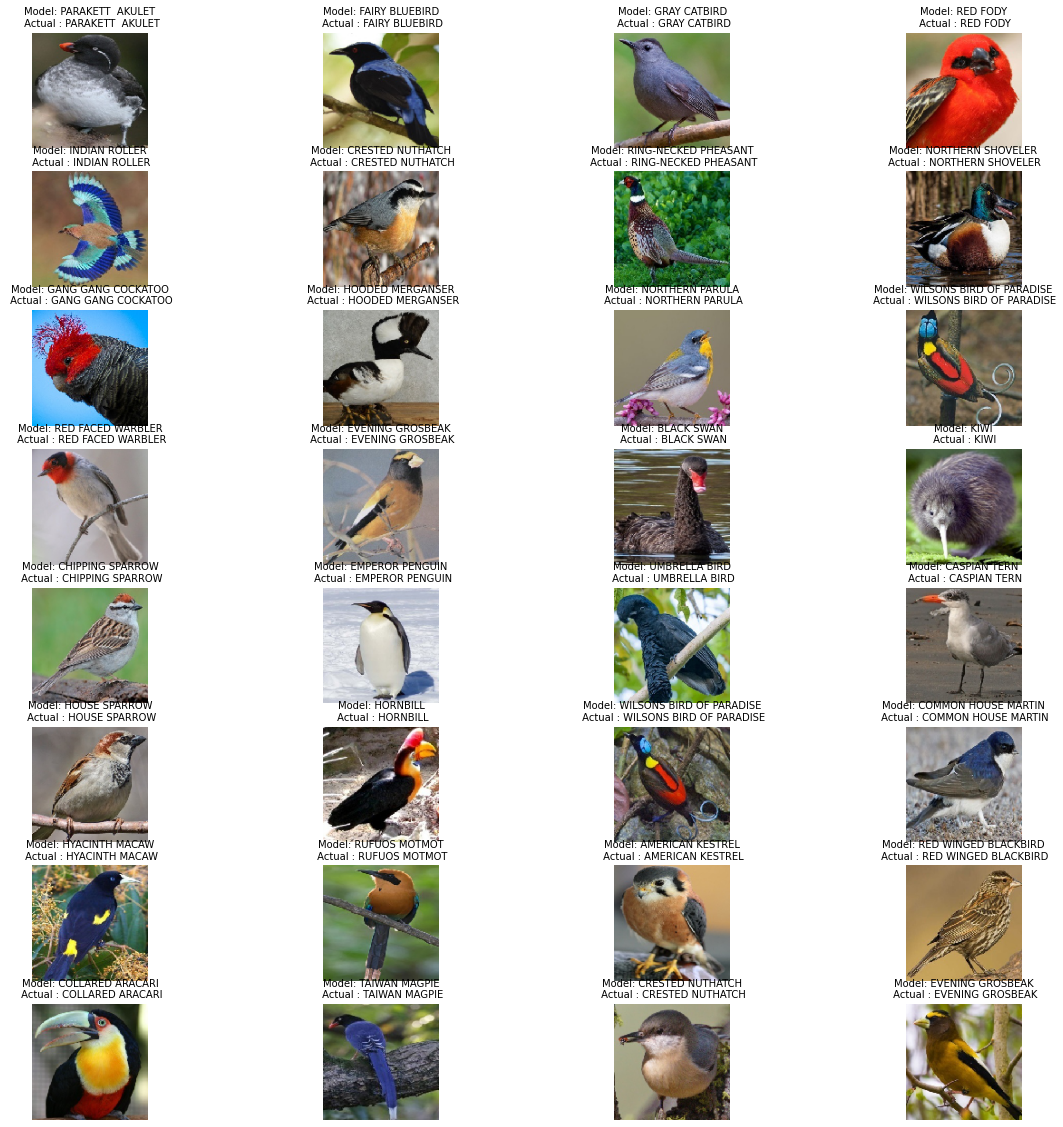

In [20]:
# now let's visualize:

# create the plot
plt.figure(figsize=(20, 20))

for i in range(len(images)):
  # create 32 subplots
  plt.subplot(8, 4, i + 1)

  # add each image to subplot and plot it
  image = images[i]
  plt.imshow(image)

  # add the predicted and actual specie name
  plt.title(f'Model: {predicted_bird_specie[i]}\n Actual : {actual_bird_specie[i]}',
            fontsize=10)
  plt.axis('off')
  
plt.show()

Done.